In [1]:
from IPython.display import clear_output

In [6]:
!pip install ctgan
clear_output()

In [7]:
!pip install table_evaluator
clear_output()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
import numpy as np

In [4]:
data = pd.read_csv('PS1A_train.csv')
data

,Index,C1,C2,C3,C4,C5,C6,C7,C8,C9,Target
0,1,3,9,9,0,6,0,1,0.60,0.43,342
1,2,3,7,11,0,0,0,1,0.84,0.53,243
2,3,1,1,23,0,4,1,2,0.40,0.82,91
3,4,3,9,6,0,0,0,1,0.58,0.88,20
4,5,2,5,9,0,6,0,1,0.54,0.49,218
...,...,...,...,...,...,...,...,...,...,...,...
6946,6947,2,4,9,0,5,1,1,0.46,0.88,359
6947,6948,2,5,17,0,5,1,1,0.66,0.34,812
6948,6949,3,8,12,0,3,1,1,0.80,0.43,189
6949,6950,1,2,7,0,2,1,1,0.24,0.65,100


In [9]:
data1 = data.drop(['Index'], axis=1)
data1.head()
categorical_features = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'Target']

In [8]:
from ctgan import CTGAN

In [10]:
ctgan = CTGAN(verbose = True)
ctgan.fit(data1, categorical_features, epochs = 1000)
samples1 = ctgan.sample(7000)
samples1

Epoch 1, Loss G:  2.2204,Loss D: -0.0699
Epoch 2, Loss G:  2.1578,Loss D: -0.0279
Epoch 3, Loss G:  2.3113,Loss D: -0.0337
Epoch 4, Loss G:  2.0926,Loss D: -0.0175
Epoch 5, Loss G:  2.2049,Loss D: -0.0095
Epoch 6, Loss G:  1.9483,Loss D: -0.0288
Epoch 7, Loss G:  1.9218,Loss D:  0.0020
Epoch 8, Loss G:  1.8309,Loss D: -0.0020
Epoch 9, Loss G:  1.8375,Loss D: -0.0455
Epoch 10, Loss G:  1.7661,Loss D: -0.0034
Epoch 11, Loss G:  1.7815,Loss D:  0.0255
Epoch 12, Loss G:  1.5489,Loss D:  0.0415
Epoch 13, Loss G:  1.4589,Loss D: -0.0032
Epoch 14, Loss G:  1.4889,Loss D:  0.0385
Epoch 15, Loss G:  1.2985,Loss D: -0.0103
Epoch 16, Loss G:  1.3619,Loss D: -0.0501
Epoch 17, Loss G:  1.2869,Loss D:  0.0222
Epoch 18, Loss G:  1.1871,Loss D:  0.0207
Epoch 19, Loss G:  0.9832,Loss D: -0.0083
Epoch 20, Loss G:  0.9394,Loss D: -0.0305
Epoch 21, Loss G:  0.8966,Loss D:  0.0276
Epoch 22, Loss G:  0.9622,Loss D:  0.0150
Epoch 23, Loss G:  0.8551,Loss D: -0.0197
Epoch 24, Loss G:  0.7731,Loss D:  0.0532
E

,C1,C2,C3,C4,C5,C6,C7,C8,C9,Target
0,2,4,6,0,0,0,2,0.496512,0.460129,13
1,1,1,21,0,5,1,3,0.206145,0.831744,117
2,2,4,16,0,0,0,1,0.420797,0.668927,163
3,4,11,1,0,2,1,1,0.149415,0.509857,229
4,2,5,6,0,6,0,1,0.510708,0.509306,253
...,...,...,...,...,...,...,...,...,...,...
6995,4,10,16,0,5,1,2,0.491766,0.558303,382
6996,3,7,23,0,5,1,1,0.818308,0.590099,333
6997,2,3,6,0,3,1,1,0.638650,0.565719,43
6998,1,12,5,0,0,0,2,0.150068,0.398417,204


In [11]:
samples1.head()
samples1.describe()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,Target
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,2.471143,5.942571,11.465857,0.055000,3.029857,0.630000,1.506571,0.482586,0.627181,175.411429
std,1.092269,3.323637,6.913709,0.227997,2.169578,0.482839,0.697361,0.213704,0.189205,152.876576
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.010603,0.008150,1.000000
25%,2.000000,3.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.309519,0.473500,41.000000
50%,2.000000,6.000000,11.000000,0.000000,3.000000,1.000000,1.000000,0.483740,0.633509,135.000000
75%,3.000000,9.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.639820,0.779598,270.250000
max,4.000000,12.000000,23.000000,1.000000,6.000000,1.000000,3.000000,1.031448,1.046378,905.000000


In [12]:
samples1.to_csv('syndata1.csv')

In [13]:
data1.head()
data1.describe()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,Target
count,6951.00000,6951.000000,6951.000000,6951.000000,6951.000000,6951.000000,6951.000000,6951.000000,6951.000000,6951.000000
mean,2.50597,6.544958,11.582362,0.026039,3.008056,0.676593,1.424112,0.496711,0.628311,192.763343
std,1.10535,3.428524,6.933607,0.159264,2.027706,0.467810,0.638762,0.192931,0.193467,185.129517
min,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,1.000000
25%,2.00000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.480000,40.000000
50%,3.00000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.630000,144.000000
75%,3.00000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.790000,285.000000
max,4.00000,12.000000,23.000000,1.000000,6.000000,1.000000,3.000000,0.980000,1.000000,976.000000


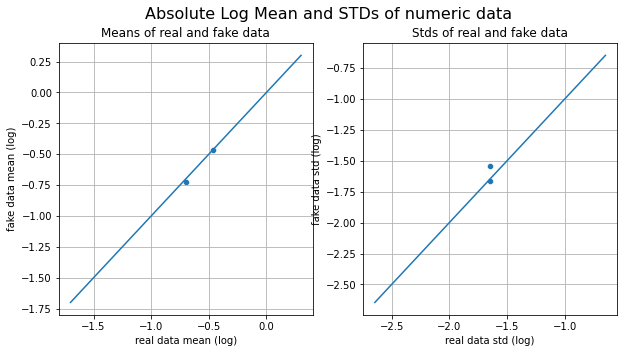

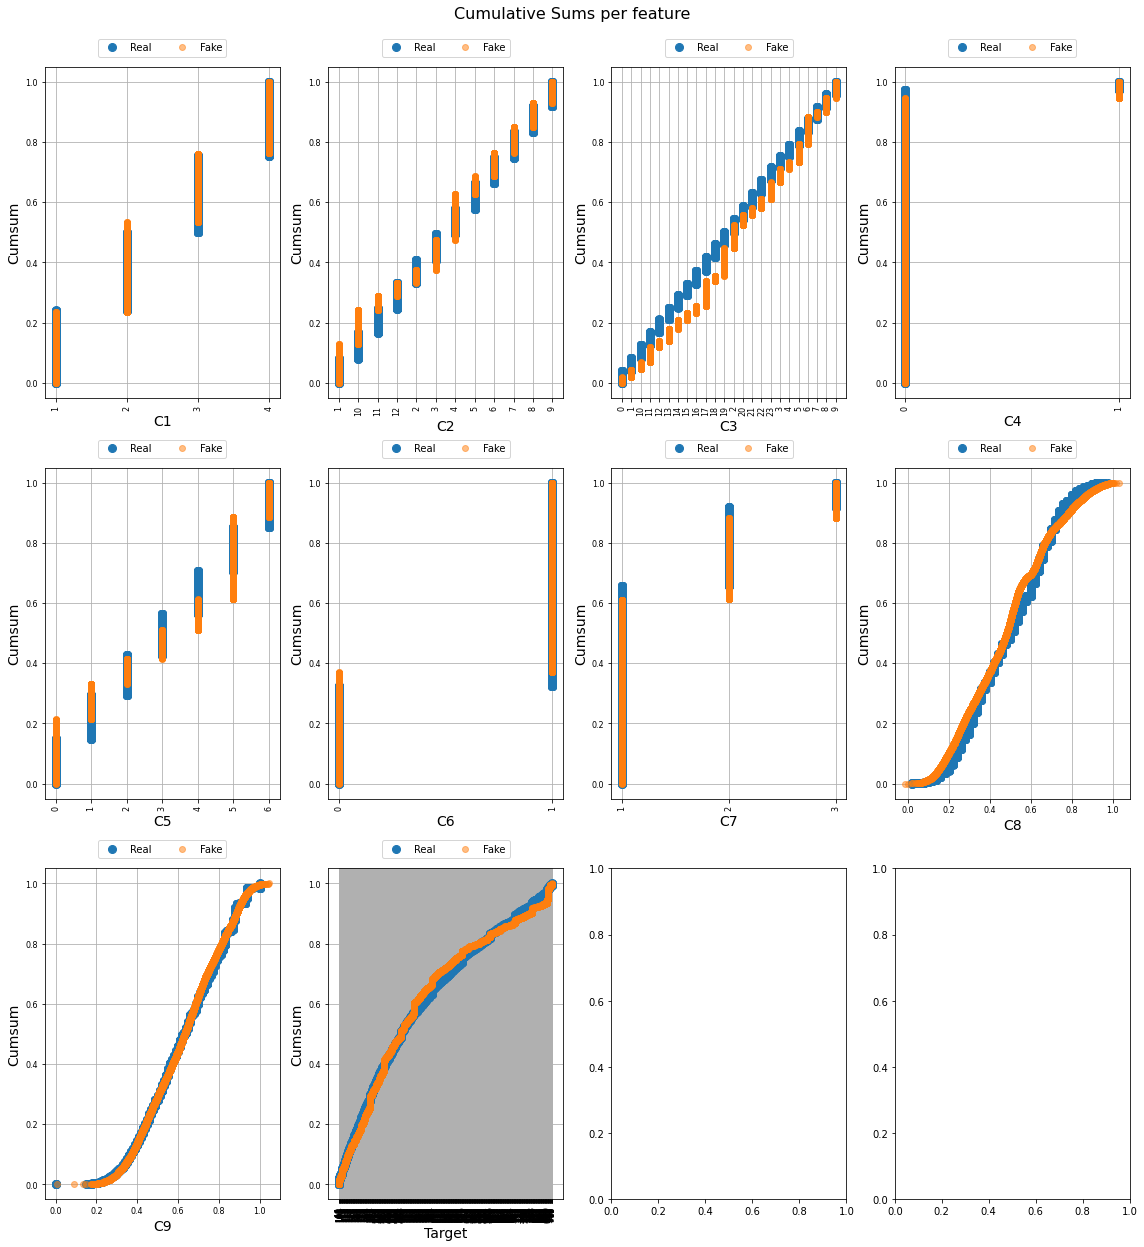

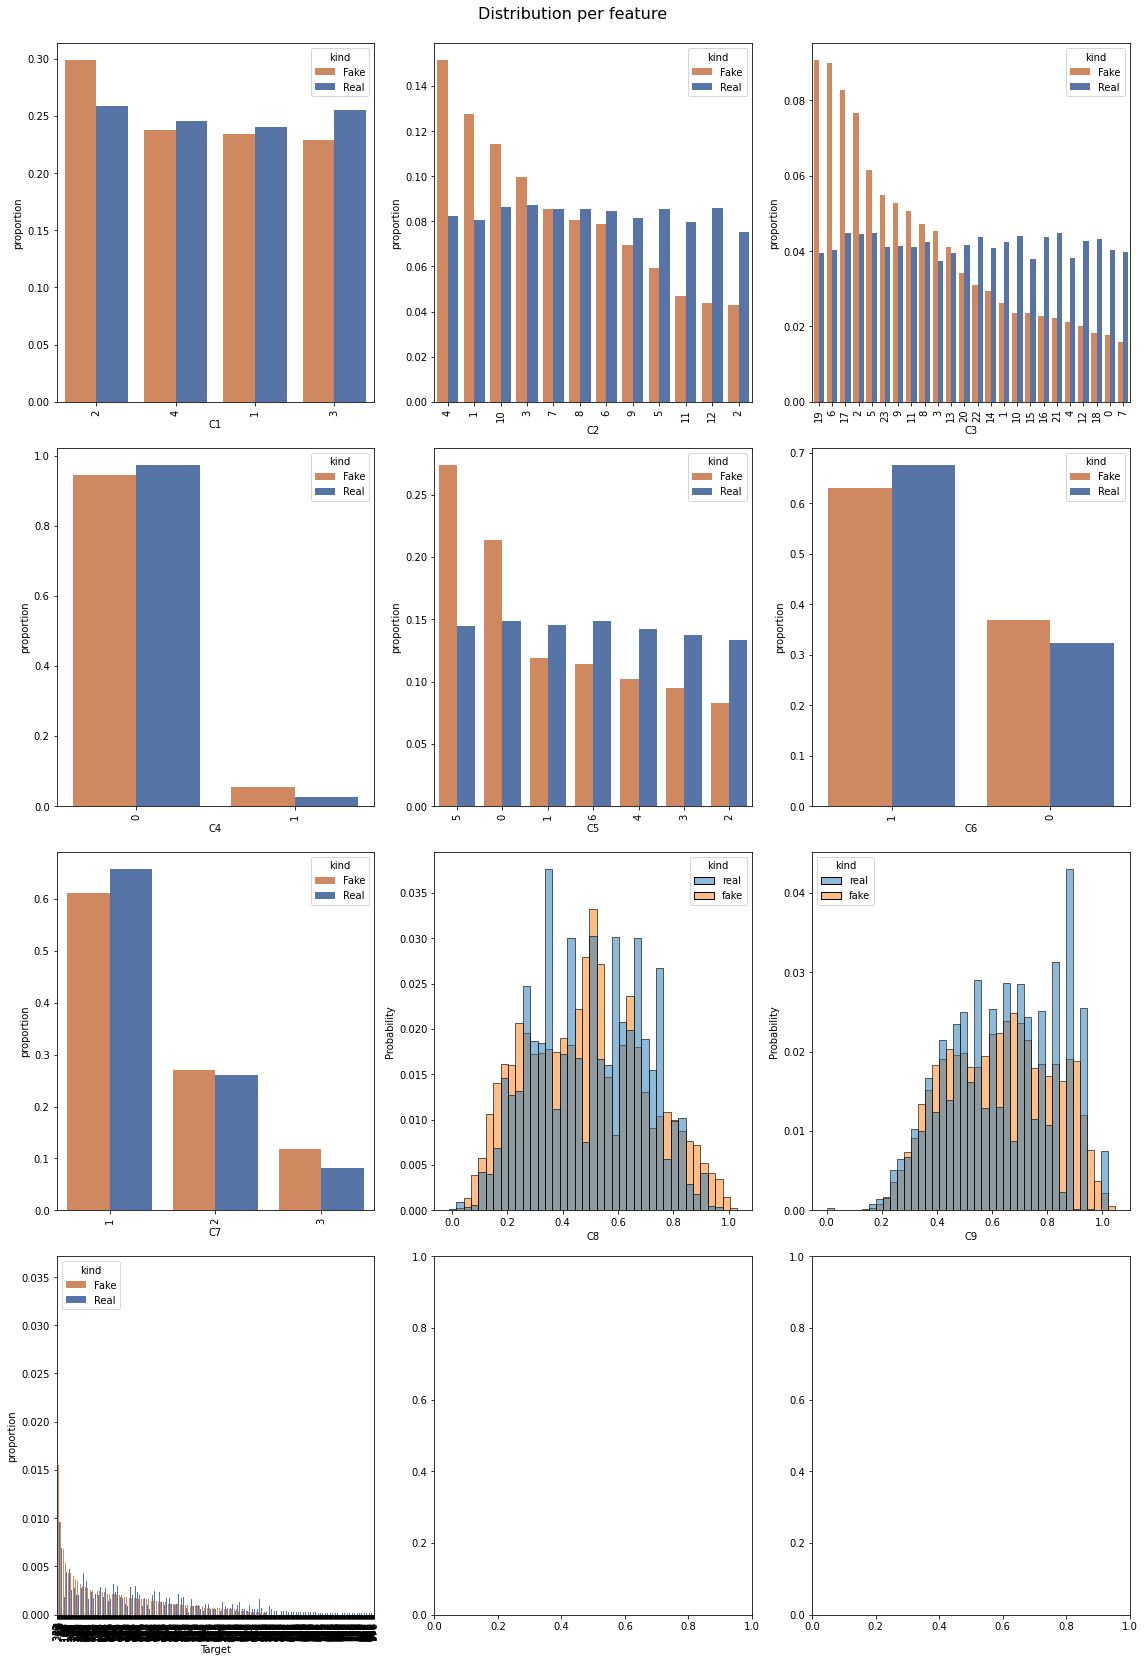

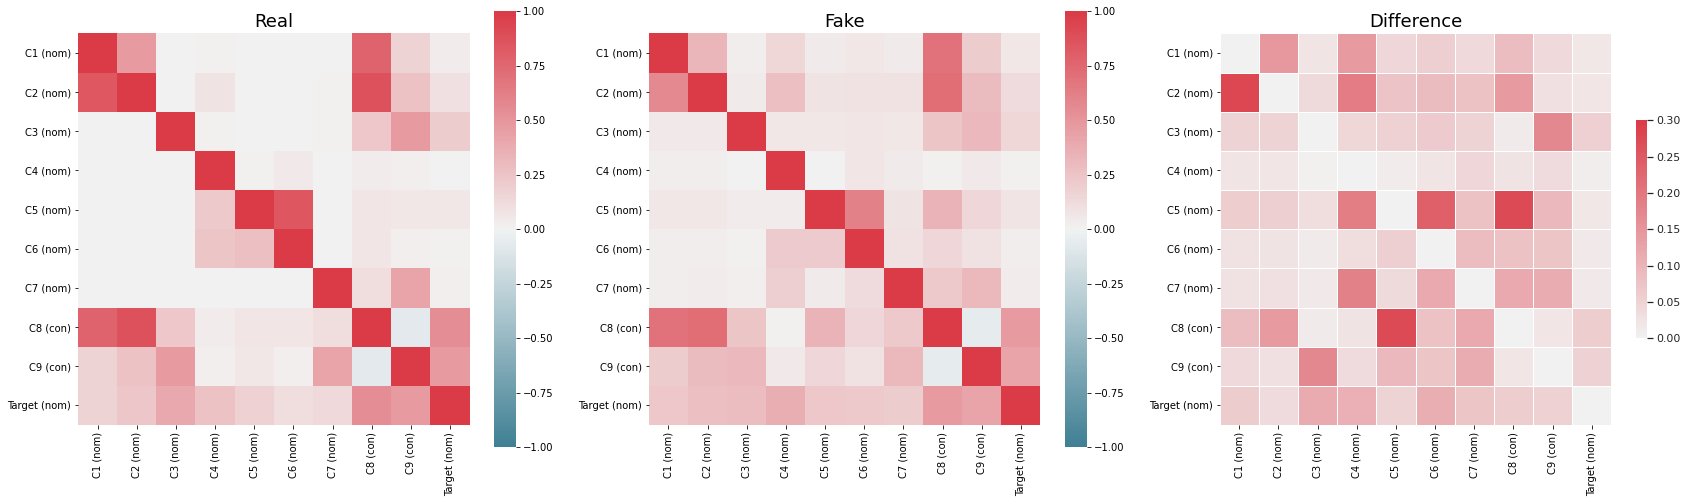

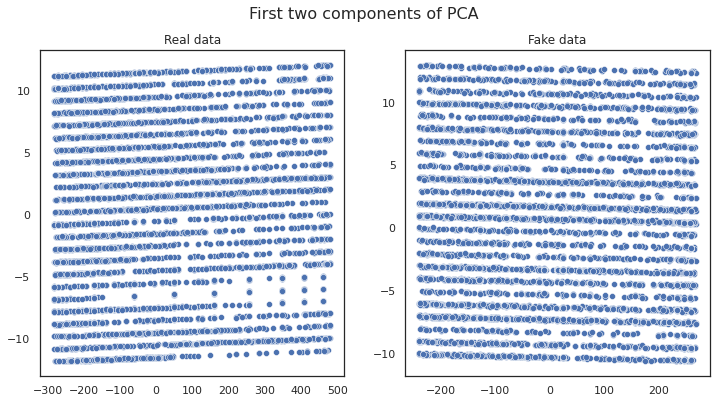

In [16]:
from table_evaluator import TableEvaluator
table_evaluator = TableEvaluator(data1, samples1, cat_cols = categorical_features)
table_evaluator.visual_evaluation()

In [21]:
test_data1 = pd.read_csv('PS1A_test.csv')
test_data1.describe()
test_data1 = test_data1.drop(['Index'], axis=1)

In [23]:
y = samples1.Target
features = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6','C7', 'C8', 'C9']
X = samples1[features]
test_X = data1[features][:1000]
expected_target = data1['Target'][:1000]

In [24]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [25]:
model = DecisionTreeRegressor(random_state = 1)
model.fit(X, y)
predictions = model.predict(test_X)
print(mean_absolute_error(expected_target, predictions))

174.086


In [27]:
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(X, y)
forest_preds = forest_model.predict(test_X)
print(mean_absolute_error(expected_target, forest_preds))


134.23029


In [ ]:
regr = LinearRegression()
regr.fit(X, y)
regr.score(X, y)

0.09189968192293785

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(X, y)
regr.score(X, y)
#regr.predict(X[:10])

0.020306991313782774

In [44]:
from sklearn.preprocessing import PolynomialFeatures

# Define the degree of the polynomial
degree = 2

# Transform the input features to polynomial features
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)
X_test_poly = poly.fit_transform(test_X)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Evaluate the model on training data
y_pred = model.predict(X_test_poly)

# Print the R-squared score
print("R-squared score:", model.score(X_test_poly, y_pred))
print("mean_squared_error:", mean_squared_error(y_pred, expected_target))
print("absolute_mean_error:", mean_absolute_error(y_pred, expected_target))

R-squared score: 1.0
mean_squared_error: 28769.778998838498
absolute_mean_error: 128.53953489332227


In [61]:
from sklearn.metrics import mean_squared_error

# Set up the XGBoost regression model
xgb_model = xgb.XGBRegressor(
    max_depth=5,
    learning_rate=0.1,
    n_estimators=100,
    verbosity=1
)

# Train the model
xgb_model.fit(X, y)

# Make predictions on the test set
y_pred = xgb_model.predict(test_X)

# Evaluate the model using mean squared error
mae = mean_absolute_error(expected_target, y_pred)
print("Mean absolute error:", mae)

y_pred = xgb_model.predict(test_data1)
pred1 = pd.DataFrame(y_pred, columns = ['Target'])
pred1.to_csv('pred1.csv')


Mean absolute error: 130.01973332595824
